In [7]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 54.6 MB/s 
     |████████████████████████████████| 5.0 MB 47.3 MB/s 
     |████████████████████████████████| 2.0 MB 72.6 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 6.8 MB 49.2 MB/s 
     |████████████████████████████████| 1.7 MB 51.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 61.8 MB/s 
     |████████████████████████████████| 1.3 MB 62.0 MB/s 
     |████████████████████████████████| 16.5 MB 37.1 MB/s 
     |████████████████████████████████| 325 kB 64.8 MB/s 
     |████████████████████████████████| 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

Saving bodyPerformance.csv to bodyPerformance (1).csv


In [2]:
df = pd.read_csv('bodyPerformance.csv')

In [3]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
df['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [5]:
from pycaret.classification import *

In [6]:
#X = df.drop('class', axis=1)
#y = df['class']

In [7]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [9]:
clf = setup(data=df , target='class')

,Description,Value
0,session_id,5562
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(13393, 12)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [10]:
#trains and evaluates the performance of all the estimators available in the model library using cross-validation
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7477,0.9223,0.7481,0.7529,0.7477,0.6637,0.6653,0.739
rf,Random Forest Classifier,0.7263,0.9110,0.7266,0.7302,0.7263,0.6351,0.6362,1.485
et,Extra Trees Classifier,0.7190,0.9037,0.7195,0.7217,0.7177,0.6255,0.6270,0.991
gbc,Gradient Boosting Classifier,0.7154,0.9043,0.7158,0.7219,0.7146,0.6206,0.6230,5.637
qda,Quadratic Discriminant Analysis,0.6627,0.8728,0.6633,0.6707,0.6644,0.5504,0.5515,0.024
dt,Decision Tree Classifier,0.6315,0.7543,0.6315,0.6322,0.6316,0.5086,0.5087,0.075
lda,Linear Discriminant Analysis,0.6089,0.8483,0.6093,0.6150,0.6107,0.4785,0.4791,0.033
lr,Logistic Regression,0.6059,0.8473,0.6062,0.6040,0.6045,0.4745,0.4748,3.849
ada,Ada Boost Classifier,0.6009,0.7284,0.6012,0.6151,0.6038,0.4679,0.4696,0.419
knn,K Neighbors Classifier,0.5524,0.7890,0.5531,0.5822,0.5547,0.4034,0.4084,0.147


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5562, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [11]:
#analyzes the performance of a trained model on the test set
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5562, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

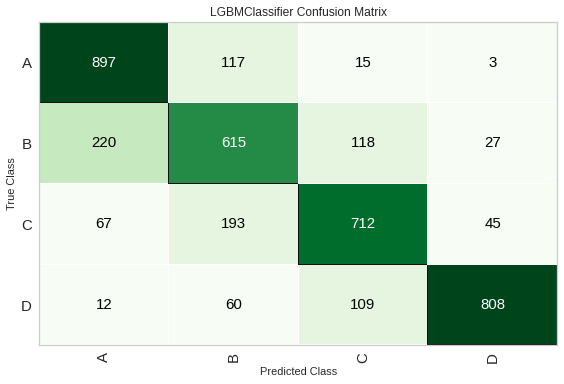

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(best, plot = 'confusion_matrix')

In [13]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5562, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7546,0.9278,0.7535,0.7591,0.7548,0.6726,0.6738


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_F,class,Label,Score
0,33.0,166.600006,59.919998,26.100000,75.0,116.0,22.299999,28.200001,38.0,179.0,1.0,C,A,0.5617
1,25.0,175.000000,72.599998,22.000000,88.0,120.0,49.799999,21.200001,58.0,226.0,0.0,B,A,0.8821
2,21.0,171.000000,67.300003,11.000000,67.0,120.0,49.700001,22.500000,57.0,260.0,0.0,A,A,0.8483
3,53.0,173.399994,69.800003,21.700001,90.0,152.0,35.200001,6.300000,32.0,156.0,0.0,C,C,0.8460
4,24.0,183.800003,73.000000,10.700000,82.0,123.0,37.099998,16.700001,59.0,239.0,0.0,B,B,0.4565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,64.0,168.600006,70.959999,21.000000,89.0,159.0,41.500000,16.900000,49.0,202.0,0.0,A,A,0.9482
4014,21.0,175.699997,65.800003,15.400000,74.0,125.0,41.099998,6.500000,45.0,223.0,0.0,C,C,0.9010
4015,40.0,176.399994,74.500000,16.700001,77.0,130.0,45.299999,17.500000,33.0,194.0,0.0,C,C,0.6605
4016,26.0,172.100006,66.099998,24.900000,62.0,102.0,19.900000,-9.900000,44.0,159.0,0.0,D,D,0.9997


In [14]:
predictions = predict_model(best, data=df.iloc[1000:1100,:], raw_score=True)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5562, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,0.9807,0,0,0,0,0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Label,Score_A,Score_B,Score_C,Score_D
1000,39,M,169.5,69.1,17.2,72.0,136.0,44.9,16.0,47.0,236.0,A,A,0.7648,0.1890,0.0423,0.0038
1001,21,F,159.6,65.9,33.8,78.0,128.0,27.2,15.7,41.0,174.0,D,B,0.0056,0.7243,0.1137,0.1563
1002,24,F,166.2,55.2,29.2,72.0,123.0,17.2,2.9,28.0,123.0,D,D,0.0000,0.0000,0.0002,0.9998
1003,23,M,174.2,68.2,19.4,83.0,141.0,41.9,15.3,48.0,213.0,C,C,0.0077,0.3353,0.6126,0.0444
1004,31,M,183.4,89.9,20.6,71.0,138.0,66.0,21.0,53.0,235.0,B,B,0.4102,0.5115,0.0649,0.0134


In [15]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7345,0.9125,0.7348,0.7340,0.7331,0.6461,0.6468
1,0.7036,0.8993,0.7039,0.7092,0.7036,0.6049,0.6064
2,0.7388,0.9219,0.7393,0.7447,0.7392,0.6518,0.6532
3,0.7260,0.9067,0.7265,0.7305,0.7259,0.6347,0.6361
4,0.7249,0.9110,0.7255,0.7291,0.7259,0.6333,0.6339
5,0.7022,0.8980,0.7026,0.7072,0.7034,0.6030,0.6037
6,0.7375,0.9134,0.7379,0.7411,0.7374,0.6500,0.6512
7,0.7204,0.9064,0.7206,0.7284,0.7208,0.6272,0.6293
8,0.7321,0.9163,0.7323,0.7354,0.7325,0.6429,0.6436


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5562, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6599,0.8805,0.6602,0.6606,0.6566,0.5466,0.5489
1,0.6450,0.8672,0.6454,0.6476,0.6383,0.5268,0.5316
2,0.6748,0.8911,0.6755,0.6813,0.6716,0.5666,0.5708
3,0.6503,0.8766,0.6511,0.6544,0.6454,0.5339,0.5378
4,0.6610,0.8787,0.6619,0.6624,0.6563,0.5482,0.5516
5,0.6628,0.8652,0.6634,0.6695,0.6602,0.5505,0.5543
6,0.6606,0.8759,0.6613,0.6641,0.6557,0.5476,0.5516
7,0.6617,0.8727,0.6621,0.6688,0.6562,0.5491,0.5547
8,0.6670,0.8886,0.6675,0.6717,0.6606,0.5562,0.5620


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=5562, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [18]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=5562, verbose=0,
                       warm_start=False)

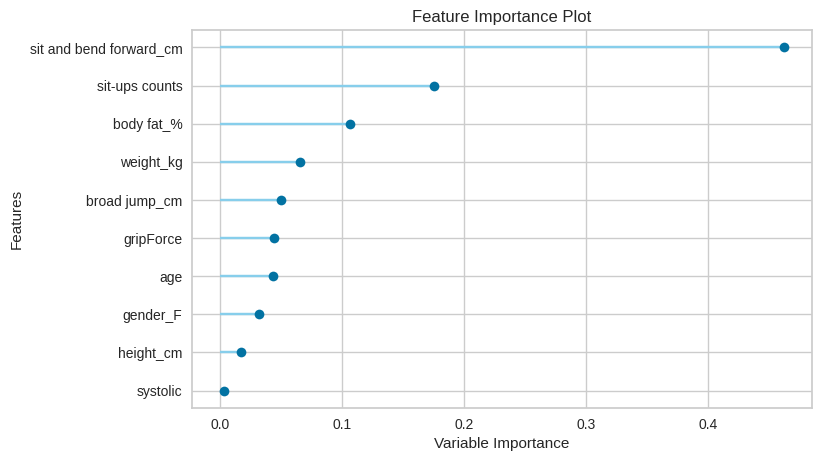

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
#feature importance
plot_model(tuned_rf, plot='feature')

In [20]:
#finalize model
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=5562, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_imp

In [21]:
final_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=5562, verbose=0,
                       warm_start=False)